In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df_qatar = pd.read_json('df230k1124_gensim.json')
len(df_qatar)
df_qatar[df_qatar['user_id'] == 240]

,user_id,item_id,timestamp,text
140600,240,2364,429152404,:small_blue_diamond: ️كلما أرى هده اللقطة أبكي...
68653,240,21332,429205987,RT @USER : The pitch invader during the Portug...
210755,240,2800,429226576,RT @USER : Zakaria Khial was shot in the head ...
213885,240,34013,429226576,RT @USER : Zakaria Khial was shot in the head ...
215512,240,240,429226576,Zakaria Khial was shot in the head by the secu...
210589,240,47960,429226576,RT @USER : Zakaria Khial was shot in the head ...
214144,240,31835,429226576,Zakaria Khial was shot in the head by the secu...
2642,240,633,429227095,Senegal are the first African team through to ...
140531,240,15548,429227287,به یاد نیکتا اسفندانی ۱۴ ساله که روز ۲۵ آبان ۱...
211877,240,38960,429228111,Setareh Tajik was a 17 years old Afghan girl w...


In [3]:
df_qatar_stats = pd.DataFrame(columns=["user_id", "interactions"])
df_qatar_stats_asCreator = pd.DataFrame(columns=["user_id", "interactions"])
df_qatar_stats_asCreator['user_id'] = df_qatar[df_qatar['user_id']!=df_qatar['item_id']]['user_id'].value_counts().index
df_qatar_stats_asCreator['interactions'] = df_qatar[df_qatar['user_id']!=df_qatar['item_id']]['user_id'].value_counts().values
df_qatar_stats_asReplyer = pd.DataFrame(columns=["user_id", "interactions"])
df_qatar_stats_asReplyer['user_id'] = df_qatar[df_qatar['user_id']!=df_qatar['item_id']]['item_id'].value_counts().index
df_qatar_stats_asReplyer['interactions'] = df_qatar[df_qatar['user_id']!=df_qatar['item_id']]['item_id'].value_counts().values

df_qatar_stats = pd.concat([df_qatar_stats_asCreator, df_qatar_stats_asReplyer])\
       .groupby('user_id')['interactions']\
       .sum().reset_index()



,user_id,interactions
240,240,76


In [11]:
len(df_qatar_stats)

52717

In [10]:
user_id_interactions = pd.merge(df_useridx_user_id, df_qatar_stats, left_index=True, right_on='user_id')
user_id_interactions

,user_id,user_id_x,user_id_y,interactions
0,0,2460990047,0,15
1,1,1591163599065677828,1,19
2,2,274750824,2,8
3,3,255718581,3,8
4,4,258036012,4,14
...,...,...,...,...
50497,60541,81276065,60541,1
50498,60542,861686859205890051,60542,1
50499,60547,212346732,60547,1
50500,60548,1562813007599931396,60548,1


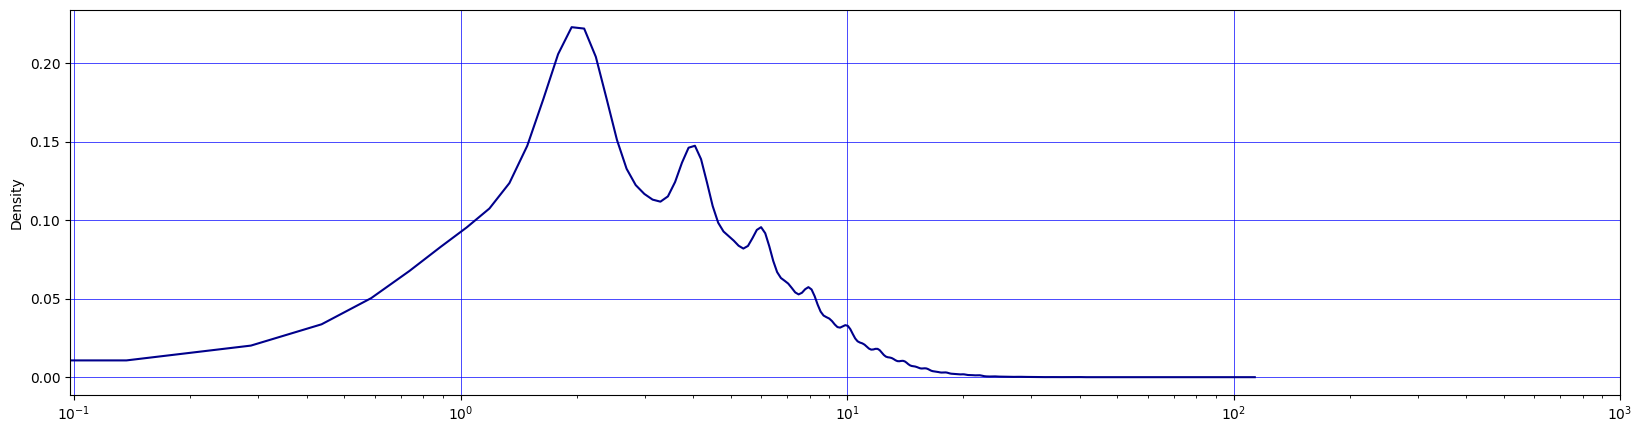

In [283]:
#df_qatar_stats['interactions'].plot(kind='kde', logx=True, figsize=(10,10))
df_qatar_stats['interactions'].plot(xticks=[1/10,1,10,100,1000], kind='kde', color="darkblue", xlabel="#interactions",figsize=(20,5), logx=True)
plt.grid(color='blue', linestyle='-', linewidth=0.5, axis="both")


In [127]:
print(len(df_qatar_stats[df_qatar_stats['interactions'] > 15])/len(df_qatar_stats))


0.020581596069579072


In [118]:
df_qatar_stats['interactions'].sum()

267310

In [157]:
len(df_qatar_stats[df_qatar_stats['interactions'] == 6])/len(df_qatar_stats)

0.0942769884477493

In [228]:
df_wiki = pd.read_csv("tgn/data/wikipedia.csv", sep=";")
df_wiki

,user_id,item_id,timestamp,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175
0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157469,2003,632,2678155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157470,3762,798,2678158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157471,2399,495,2678293.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157472,7479,920,2678333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\Users\feder\anaconda3\envs\bert\lib\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


0.0  0  -0.175063  -0.176678  -0.937091  -0.381926  0.0  -0.636535  1.052396  -0.16938  -0.19304  -0.169234  -0.828942  -0.175093  -0.239675  -0.081759  -0.438492  -0.265227  -0.270534  -0.766241  -0.230818  -0.208397  -0.031458  -0.146052  -0.125919  -0.114999  -0.073666  -0.080377  -0.039977  -0.086417  -0.07646  -0.115336  -0.112976  -0.129556  -0.114021  -0.126911  -0.112939  -0.08632  -0.12648  -0.140237  -0.127462  -0.101234  -0.12889  -0.12375  -0.036678  -0.132163  -0.091828  -0.076866  -0.083422  -0.132653  -0.132271  -0.113523  -0.082894  -0.100532  -0.075784  -0.143635  -0.127528  -0.128455  -0.099046  -0.112457  -0.118284  -0.105322  -0.117228  -0.105303  -0.130077  -0.117335  -0.100452  -0.082987  -0.109775  -0.082519  -0.09015  -0.061807  -0.076595  -0.154405  -0.133709  -0.149318  -0.147526  -0.157631  -0.133908  -0.142128  -0.101243  -0.094235  -0.084585  -0.089205  -0.05786  -0.067859  -0.055429  -0.052329  -0.085588  -0.08401  1.756454  -0.289939  0.0  -0.41799  -1.41

In [230]:
df_wiki_stats = pd.DataFrame(columns=["user_id", "interactions"])
df_wiki_stats['user_id'] = df_wiki["user_id"].value_counts().index
df_wiki_stats['interactions'] = df_wiki["user_id"].value_counts().values

df_wiki_stats

,user_id,interactions
0,1087,1603
1,615,1396
2,124,1296
3,400,1180
4,134,1161
...,...,...
8222,4572,1
8223,6621,1
8224,6185,1
8225,4136,1


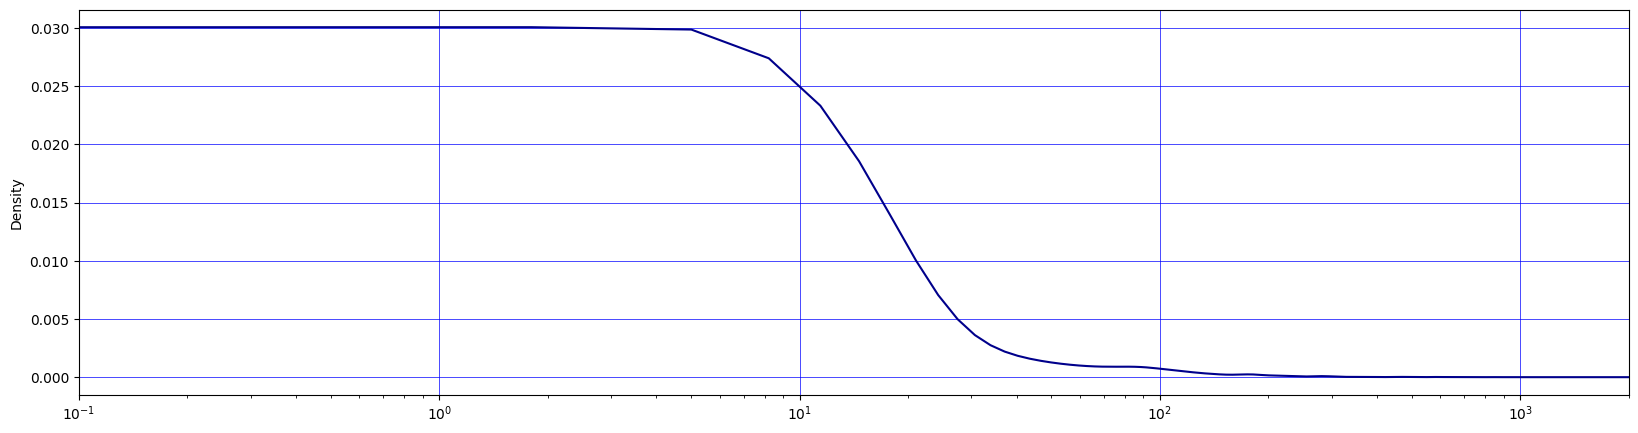

In [282]:
#df_qatar_stats['interactions'].plot(kind='kde', logx=True, figsize=(10,10))
df_wiki_stats['interactions'].plot(xticks=[1/10, 1, 10, 100,1000], xlim=[0,2000], kind='kde', color="darkblue", xlabel="#interactions",figsize=(20,5), logx=True)
plt.grid(color='blue', linestyle='-', linewidth=0.5, axis="both")

In [258]:
df_wiki_stats['interactions'].max()

1603

In [259]:
print(len(df_wiki_stats[df_wiki_stats['interactions'] > 300])/len(df_wiki_stats))
print(len(df_wiki_stats[df_wiki_stats['interactions'] >= 1500]))

0.007657712410356145
1


In [4]:
df_users = pd.read_json("df_authors_username_qatar.json")
df_users.drop_duplicates()

,user_id,username
0,1526589356747661312,shhvisi
1,1380638725894459392,bettingwithbaz
2,4782551,Vahid
3,524531680,SC_ESPN
4,156668722,MechiMargalot
...,...,...
168161,451772913,MartinFayulu
168171,19624061,el_Periodico
168181,1134156547758731264,coachalioucisse
168182,1317423661066891264,AsmaouColy


In [9]:
dfaa = pd.read_json('df_qatar260k_nonormalize_withauthorid.json')
df_raw = pd.read_json('qtrmod.json')

In [137]:
dfab = dfaa['author_id'].drop_duplicates()
dfab[dfab.index>2100][:3]

2102    1571744370214277120
2104    1435009230612926464
2106     703414780367937536
Name: author_id, dtype: int64

In [188]:
df_users

,user_id,username
0,1526589356747661312,shhvisi
1,1380638725894459392,bettingwithbaz
2,4782551,Vahid
3,524531680,SC_ESPN
4,156668722,MechiMargalot
...,...,...
168232,52444859,justchangingun
168233,3396735569,chibz42
168234,1108428545058054144,__Injaneb96
168235,1549674520713510912,FIFAWorldCup_JP


In [150]:
dfaa['author_id'].drop_duplicates()

0         1513877390115717120
1         1526589356747661312
2         1380638725894459392
4                  2388538481
5         1303026765737218048
                 ...         
262037    1536807584379949056
262038              523771401
262039    1370521210849742848
262043    1470998377571786752
262051    1037340991898955776
Name: author_id, Length: 72086, dtype: int64

In [154]:
dfaa['author_id'].drop_duplicates()[dfaa['author_id'].drop_duplicates().index>dfaa['author_id'].drop_duplicates()[dfaa['author_id']==df_users[df_users['username']=='Peloteando_SV'].drop_duplicates()['user_id'].values[0]].index[0]]

50589               110201253
50590     1505771431845834752
50592     1576417071826624512
50604               362624252
50607                49570064
                 ...         
262037    1536807584379949056
262038              523771401
262039    1370521210849742848
262043    1470998377571786752
262051    1037340991898955776
Name: author_id, Length: 53235, dtype: int64

In [19]:
for id in dfaa['author_id'].drop_duplicates():
    print(id)

1513877390115717120
1526589356747661312
1380638725894459392
2388538481
1303026765737218048
1281720444828225536
4782551
1220611072945729536
524531680
1284968922446532608
52444859
1524425390760071168
4188853468
1287149491385241600
1108428545058054144
1046171659261087744
306801715
951819295947927552
1582329765817733120
1566867180624437248
885120517547716608
138372303
1516017544112443392
460537897
1427143278923632640
1526164600647036928
84362822
723589039
1384130674265792512
3808605617
1400315659
738860792469180416
2203231058
1530765675311996928
1576550953398018048
796770811071885312
1596533673179942912
118864905
698127258804842496
576241232
1549135795612786688
1527413651589713920
1409798257
950033383010258944
1134062864493293568
1420055739008233472
93601274
221324862
265902729
1294227682142687232
947924373029171200
1575801848581062656
703563007507439616
1438539246130827264
1546392881396604928
3146226128
330262748
1563090029215289344
1593277574968492032
2469285661
1484952288913416192
10822

In [8]:
df_merged = pd.merge(dfaa, df_raw, on='tweet_id')

In [6]:
df_raw[df_raw['user_id']==262045]

,user_id,tweet_id,conversation_id,timestamp,text
15,262045,1597882206877233152,1597664864390246400,2022-11-29 17:52:41,"Hasti Norayei, 7 years old\nShot in the head b..."
19,262045,1597882203853447168,1597801749724774400,2022-11-30 02:56:37,There's no division. Here is the side of peopl...
75,262045,1597882147662086144,1597665326287634432,2022-11-29 17:54:31,"Javad Poosheh,12 years old \nmurdered by the r..."
85,262045,1597882133087145984,1597666154847547392,2022-11-29 17:57:49,"Muhammad Shahnavazi, 16 years old\nChild worke..."
188,262045,1597664864390246400,1597664864390246400,2022-11-29 17:52:41,"Hasti Norayei, 7 years old\nShot in the head b..."
...,...,...,...,...,...
261717,262045,1597666154847547392,1597705914785878016,2022-11-29 17:57:49,"RT @__Injaneb96: Muhammad Shahnavazi, 16 years..."
261780,262045,1597704914180132864,1597705905738780672,2022-11-29 20:31:50,"RT @__Injaneb96: Mohsen Mohammad Pour, 17 year..."
261792,262045,1597664864390246400,1597705904887304192,2022-11-29 17:52:41,"RT @__Injaneb96: Hasti Norayei, 7 years old\nS..."
261906,262045,1597704914180132864,1597704914180132864,2022-11-29 20:31:50,"RT @__Injaneb96: Mohsen Mohammad Pour, 17 year..."


In [29]:
count = 0
user_idxs = {}
for user_id in dfaa['author_id']:
    user_idxs[user_id] = count
    count+=1

In [30]:
for user_id in dfaa['author_id']:
    user_idxs[user_id] = count

258309

In [18]:
cnt = 0
tweets_ids = {}
for tweet_id in df_raw['tweet_id']:
    tweets_ids[tweet_id] = cnt
    cnt+=1

In [19]:
tweets_ids_list = []
for tweet_id in df_raw['tweet_id']:
    tweets_ids_list.append(tweet_id)

In [20]:
df_filtered = df_raw[df_raw['conversation_id'].isin(tweets_ids_list)]
len(df_filtered)

260052

In [21]:
tweet2author = {}
c = 0
for user_id, tweet_id in zip(df_filtered['user_id'], df_filtered['tweet_id']):
    tweet2author[tweet_id] = user_id

In [8]:
df = pd.DataFrame(columns=["user_id", "item_id", "timestamp", "text"])
errors = 0
for index, row in df_filtered.iterrows():
    try:
        df.loc[len(df.index)] = [row['user_id'], tweet2author[row['conversation_id']], row['timestamp'], row['text']]
    except:
        errors+=1
print(str(errors))

409


In [9]:
df.to_json('dfqtr_final.json')

In [46]:
with open('list_tweets_user_idxs.txt', 'w') as f:
    for line in list(tweet2author):
        f.write("%s\n"%line)

In [8]:
df = pd.DataFrame(columns=["user_id", "tweet_id", "conversation_id", "timestamp", "text"])
for index, row in df_raw.iterrows():
    df.loc[len(df.index)] = [user_idxs[row['author_id']], row['tweet_id'], row['conversation_id'], row['timestamp'], row['text']]

In [37]:
df = df.sort_values(by='timestamp')
df.sample(10)

,user_id,item_id,timestamp,text
245340,261432,261432,2022-11-29 20:44:31,🇪🇨 Moisés Caicedo y un llanto desconsolado tra...
80548,81428,81428,2022-11-29 18:34:27,La robotique et le @FCBarcelona ont fasciné Ki...
172589,174191,174191,2022-11-29 22:01:02,🇳🇱試合結果🇶🇦\nオランダ、2発完勝で決勝トーナメント進出を決める！…開催国カタールは3戦...
66954,74738,261818,2022-11-30 03:32:46,RT @aaliaa: AmirHossein Basati was a jolly 15-...
246503,248787,248787,2022-11-29 20:43:46,ฟุตบอลโลก 2022 นัดที่สองกลุ่ม H\n\n🇰🇷 เกาหลีใต...
66717,262034,262034,2022-11-29 16:22:06,"Danial Paybandi, a 17-year-old, was in his dad..."
223284,225388,225388,2022-11-29 21:01:25,#Qatar2022 | Estados Unidos venció por la míni...
135785,261956,261956,2022-11-29 11:44:30,برای ثبت در تاریخ. بدون ذره‌ای حمایت از طرف اع...
93111,249692,249692,2022-11-30 01:52:34,RT @schahighheck: Am 30. September erschossen ...
178066,179725,179725,2022-11-29 16:33:49,"RT @issouf_sagnon: #Qatar2022 #Sénegal , c'est..."


In [204]:
df = pd.read_json('dfirs_final.json')

In [205]:
df

,user_id,item_id,timestamp,text
0,303454,219497,2023-01-10 05:12:19,RT @bperras12: @SpeakerPelosi @HouseGOP We sho...
1,156885,91881,2023-01-10 15:58:44,@SpeakerPelosi @HouseGOP We should dismantle t...
2,91881,305398,2023-01-10 01:50:09,RT @SallyDeal4: @SpeakerMcCarthy The whole pre...
3,230015,306769,2023-01-10 15:58:44,"@SpeakerMcCarthy The whole premise of 87,000 I..."
4,1262,306769,2023-01-10 01:36:03,@RepMTG IRS agents… Take a good look at MTG an...
...,...,...,...,...
303995,307210,307211,2023-01-09 16:57:46,RT @realJohnACastro: The only 3-letter agency ...
303996,307211,307212,2023-01-09 16:57:46,RT @realJohnACastro: The only 3-letter agency ...
303997,307212,307213,2023-01-09 16:57:46,RT @realJohnACastro: The only 3-letter agency ...
303998,307213,307214,2023-01-09 16:57:46,RT @realJohnACastro: The only 3-letter agency ...


In [25]:
df[df['user_id']!=df['item_id']][df['item_id']==258309]

C:\Users\feder\AppData\Local\Temp\ipykernel_1416\1456249260.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['user_id']!=df['item_id']][df['item_id']==258309]


,user_id,item_id,timestamp,text
7,115513,258309,2022-11-30 08:16:21,RT @SC_ESPN: ¡Arrancamos! Prendete a #SportsCe...
714,231064,258309,2022-11-30 08:13:39,'«۹ آذر، خیابون پیروزی تهران'\n #مهسا_امینی #I...
843,1402,258309,2022-11-30 08:13:09,«مرگ بر دیکتاتور»\n'تشویق علی کریمی در فلاح ته...
1219,1244,258309,2022-11-30 08:11:42,RT @Kohei2Shiraishi: W杯開幕戦で披露→話題沸騰中の最新VAR 🏁\n\...
1274,202228,258309,2022-11-30 08:11:30,"RT @justchangingun: #MehranSamak, 27, was shot..."
...,...,...,...,...
246859,261354,258309,2022-11-29 20:43:32,پیش‌پیش بلندگوها رو کار گذاشتند بلکه صدای دیگر...
248869,261826,258309,2022-11-29 20:42:11,"RT @__Injaneb96: Javad Poosheh,12 years old \n..."
249510,261896,258309,2022-11-29 20:41:45,RT @The_Zhalzzz: Hasti Narooyi. She was 7 &amp...
252624,254967,258309,2022-11-29 15:21:25,RT @Vahid: پیش‌پیش بلندگوها رو کار گذاشتند بلک...


In [206]:
df_qatar_stats = pd.DataFrame(columns=["user_id", "interactions"])
df_qatar_stats_asCreator = pd.DataFrame(columns=["user_id", "interactions"])
df_qatar_stats_asCreator['user_id'] = df[df['user_id']!=df['item_id']]['user_id'].value_counts().index
df_qatar_stats_asCreator['interactions'] = df[df['user_id']!=df['item_id']]['user_id'].value_counts().values
df_qatar_stats_asReplyer = pd.DataFrame(columns=["user_id", "interactions"])
df_qatar_stats_asReplyer['user_id'] = df[df['user_id']!=df['item_id']]['item_id'].value_counts().index
df_qatar_stats_asReplyer['interactions'] = df[df['user_id']!=df['item_id']]['item_id'].value_counts().values

df_qatar_stats = pd.concat([df_qatar_stats_asCreator, df_qatar_stats_asReplyer])\
       .groupby('user_id')['interactions']\
       .sum().reset_index()

In [226]:
len(df_qatar_stats['interactions'][df_qatar_stats['interactions']>2000])

8

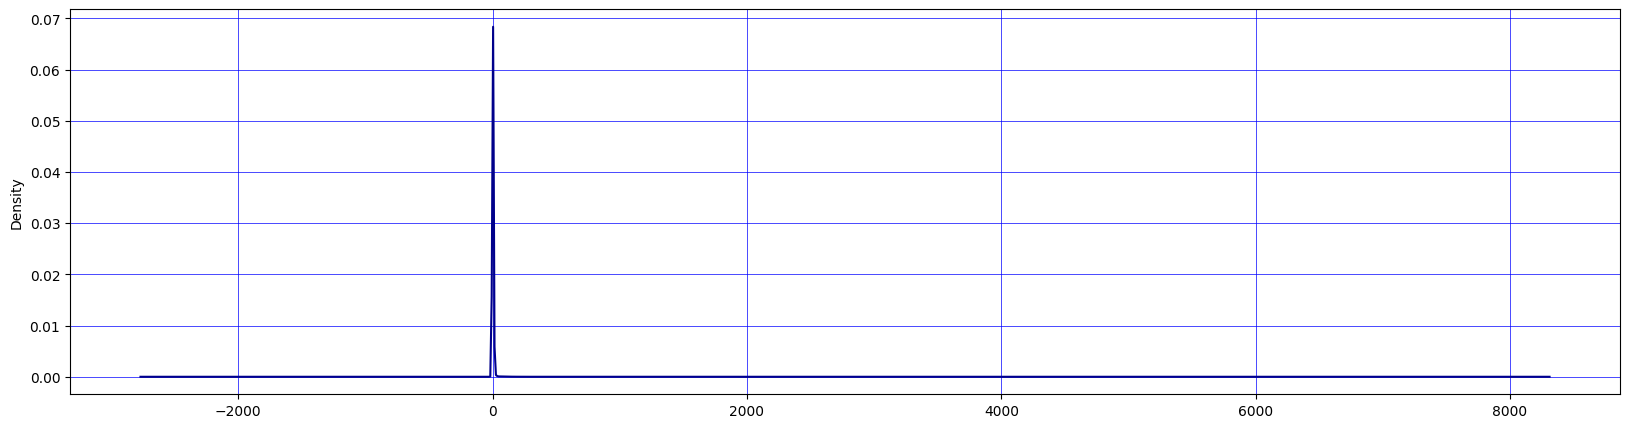

In [220]:
#df_qatar_stats['interactions'].plot(kind='kde', logx=True, figsize=(10,10))
df_qatar_stats['interactions'].plot(kind='kde', color="darkblue", xlabel="#interactions",figsize=(20,5))
plt.grid(color='blue', linestyle='-', linewidth=0.5, axis="both")

In [187]:
import os
count=0
ids = df_qatar_stats[df_qatar_stats['interactions'] >= 100]['user_id']
existing_ids = set()
for id in ids:
    if os.path.exists("tweets/tweets-"+str(id)+".json"):
        existing_ids.add(id)
        count+=1

left_idxs = set(ids)-existing_ids

print(left_idxs)
print(len(left_idxs))
print(str(len(ids)))
print(str(count))

{261760, 254977, 240899, 206725, 261639, 240904, 259336, 184200, 261514, 261644, 261645, 262027, 241171, 261779, 60950, 261662, 261155, 261668, 261795, 261544, 259628, 261804, 143276, 261552, 261688, 260538, 261562, 260798, 260542, 261698, 193218, 261572, 260677, 260808, 261576, 261582, 181327, 199759, 259414, 261723, 258395, 238173, 260575, 93665, 251110, 256743, 252775, 259046, 258794, 246763, 261743, 198386, 262002, 262007, 261624, 261626, 261628, 259838}
58
172
114


In [ ]:
from twitter_users_scraping import scrapeByIds
scrapeByIds(left_idxs)

In [ ]:
import os
import glob

count=0
ids = df_qatar_stats[df_qatar_stats['interactions'] >= 100]['user_id']
idxs = set()

files = glob.glob('tweets/*', recursive=True)

for single_file in files:
    with open(single_file, 'r') as f:
        idxs.add(str(single_file).split('-')[1].split('.')[0])

ids=set(ids.to_list())

print(ids-idxs)

print(str(len(ids-idxs)))
print(str(len(idxs)))

In [57]:
df['author_id']

0         1513877390115717120
1         1526589356747661312
2         1380638725894459392
3         1380638725894459392
4                  2388538481
                 ...         
262048              252474314
262049             2437237330
262050     828541926701887488
262051    1037340991898955776
262052    1341489526921981952
Name: author_id, Length: 262053, dtype: int64

In [80]:
dfirs = pd.read_json('dfirs_gensim.json')
dfirs

,user_id,author_id,item_id,timestamp,text
0,0,1586032937853755392,0,2023-01-10 05:12:19,RT @bperras12: @SpeakerPelosi @HouseGOP We sho...
1,0,607305422,0,2023-01-10 15:58:44,@SpeakerPelosi @HouseGOP We should dismantle t...
2,0,1133503747882196992,0,2023-01-10 01:50:09,RT @SallyDeal4: @SpeakerMcCarthy The whole pre...
3,0,817825066993860608,0,2023-01-10 15:58:44,"@SpeakerMcCarthy The whole premise of 87,000 I..."
4,0,1146688304,0,2023-01-10 01:36:03,@RepMTG IRS agents… Take a good look at MTG an...
...,...,...,...,...,...
307212,97271,1227189142468976640,97271,2023-01-09 16:57:46,RT @realJohnACastro: The only 3-letter agency ...
307213,59286,736485104701296640,59286,2023-01-09 16:57:46,RT @realJohnACastro: The only 3-letter agency ...
307214,54308,1020935728698613760,54308,2023-01-09 16:57:46,RT @realJohnACastro: The only 3-letter agency ...
307215,96050,1056750676263362560,96050,2023-01-09 16:57:46,RT @realJohnACastro: The only 3-letter agency ...
